In [1]:
import numpy as np
import gradio as gr
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.patches as patches


ModuleNotFoundError: No module named 'gradio'

In [34]:
def model(input_img):
    image = cv2.resize(input_img, dsize=(180, 180))

    model = tf.keras.models.load_model('exported_model.h5')
    bounding_box, class_pred = model.predict(np.expand_dims(image / 255., axis=0))

    fig = plt.figure()
    ax = plt.gca()

    startX, startY, endX, endY = bounding_box[0]

    top = startY
    left = startX
    width = endX - startX
    height = endY - startY

    top *= 180
    height *= 180
    left *= 180
    width *= 180

    rect = patches.Rectangle((left, top), width, height, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

    plt.imshow(image)
    ax.axis('off')

    return np.argmax(class_pred), fig


Thanks for being a Gradio user! If you have questions or feedback, please join our Discord server and chat with us: https://discord.gg/feTf9x3ZSB
Running on local URL:  http://127.0.0.1:7884
Running on public URL: https://22c61849b3650f7a.gradio.app

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


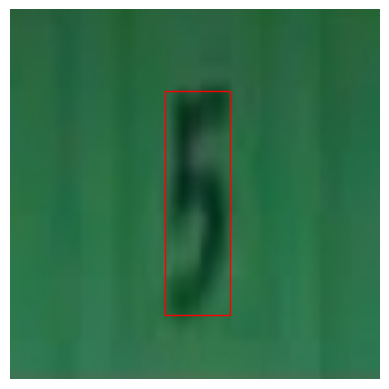

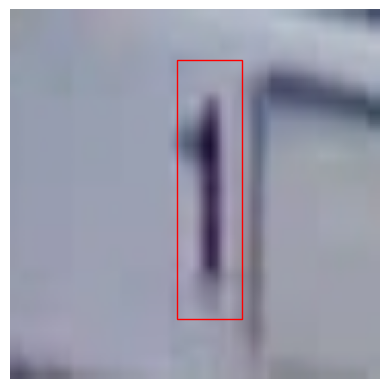

1/1 [==============================] - 0s 211ms/step


2022-12-03 09:16:56.354173: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 202ms/step


2022-12-03 09:17:18.948206: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 198ms/step


2022-12-03 09:17:30.635644: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 241ms/step


2022-12-03 09:18:49.785335: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 240ms/step


2022-12-03 09:18:57.184013: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 241ms/step


2022-12-03 09:19:21.199015: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [36]:
with gr.Blocks() as demo:
    image = gr.Image()
    gr.Examples(["./test/1.png", "./test/39.png"], inputs=image)
    digit = gr.Textbox(label="Dígito identificado")
    bbox = gr.Plot(label="Localización del dígito")
    pred_btn = gr.Button("Predicción")
    pred_btn.click(fn=model, inputs=image, outputs=[digit, bbox])

demo.launch(share=True)